In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import cv2

original image


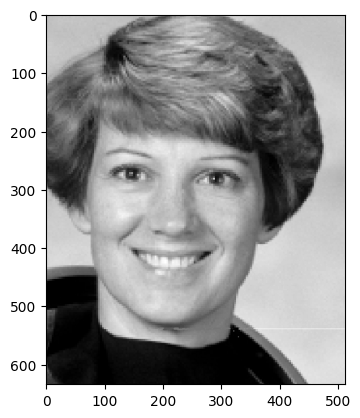

sub image (the template)


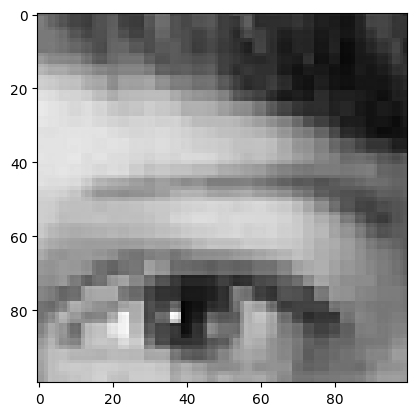

Template found in the original image!
The start pixel (top left) of the source image which matche the template :: x =  200  and y =  250


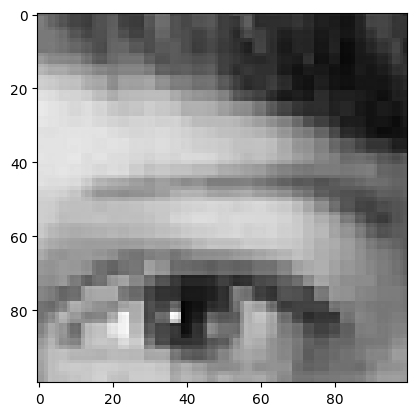

The original template for reference :: 


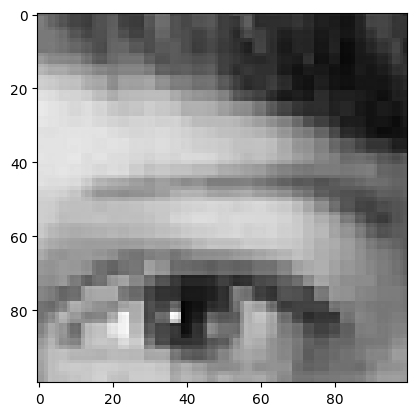

In [13]:
image = cv2.imread('face1.png')

# Conversion of image to gray scale.
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_width, image_height = image.shape

print('original image')
plt.imshow(image, cmap='gray')
plt.show()

print('sub image (the template)')
subimage = image[200:300,250:350]
plt.imshow(subimage, cmap='gray')
plt.show()

winW = 0
found = False

fullW = image_width
subW = subimage.shape[0]

fullH = image_height
subH = subimage.shape[1]

while winW < fullW - subW and not found:
    winH = 0
    while winH < fullH - subH:
        window = image[winW:winW+100,winH:winH+100]
        if ssim(subimage, window) > 0.80: # SSIM : Structural simularity.
            # Might as well use direct checking over here (if the template is directly from the image, with no illumination changes).
            found = True
            print('Template found in the original image!')
            print("The start pixel (top left) of the source image which matche the template :: x = ", winW, " and y = ", winH)
            plt.imshow(image[winW:winW+100, winH:winH+100], cmap='gray')
            plt.show()
            
            print("The original template for reference :: ")
            plt.imshow(subimage, cmap='gray')
            plt.show()
            break
        winH += 2
    winW += 2

if found == False:
    print('found : ', found)
     